In [1]:
%matplotlib qt
import matplotlib.pyplot as plt
import math
import scipy.constants as sc
import numpy as np
from sklearn.metrics import auc
import scipy.integrate as integrate

In [2]:
h_bar = sc.hbar
pi = sc.pi

#Diatomic molecule (CO)
m = 1.99e-26
omega_w = 3.581368e14 

A = (m*omega_w / (pi*h_bar))**(1/4)       #normalization constant
print(A)
print(h_bar, pi, omega_w,m)

382973.7416482974
1.0545718176461565e-34 3.141592653589793 358136800000000.0 1.99e-26


In [3]:
#from functools import lru_cache

#@lru_cache
def hermite2(n, eps):
    if n<0:
        return ("error in the value of n")
    elif n == 0:
        return 1
    elif n == 1: 
        return 2*eps
    else:
        return 2*eps*hermite2(n-1,eps)-2*(n-1)*hermite2(n-2,eps)


def Psi_n_x(eps,n):
    A_n = 1/((2**n*math.factorial(n))**(1/2)) 
    z = hermite2(n,eps)
    y = (A)*A_n*z*math.exp(-(eps**2)/2)  #normalized-wavefunction
    return y

def wavefunction(x,n):   
    z = []
    for i in np.nditer(x):
        z.append(Psi_n_x(i,n))
    return (z)

def probability_density(x):
    a = []
    for i in x:
        a.append(i**2)
    return a

def classical_P(x,n):
    E = h_bar*omega_w*(n+0.5)
    x_max = np.sqrt(2*E/(m*omega_w**2))
    classical_prob = np.zeros(x.shape[0])
    x_ins = abs(x) < (x_max - 0.025)
    classical_prob[x_ins] = 1./np.pi/np.sqrt(x_max**2-x[x_ins]*x[x_ins])
    return classical_prob


def return_plot_Psi(eps1, n):
    plt.plot(x_1, wavefunction(eps_1,n))
    plt.ylabel('$\Psi(x) $', fontsize = 20)
    plt.xlabel('x')

def return_plot_Psi_squared(eps1, n):
    wv_1 = wavefunction(eps_1, n)
    plt.plot(x_1, probability_density(wv_1))
    plt.ylabel( '$|\Psi(x)|^2$', fontsize = 10)
    plt.xlabel('x')

    
def get_area_Psi_squared(eps_1,n,x1,x2):
    x_3 = np.arange(x1, x2, 10**(-14)) 
    eps_3 = x_3*((m*omega_w/h_bar)**(1/2))
    wv_3 = wavefunction(eps_3,n) 
    psi_sq = probability_density(wv_3)
    area = integrate.trapz(psi_sq,eps_3, dx = 10**(-14))
    plt.plot(x_3, psi_sq)
    return area

#work on this


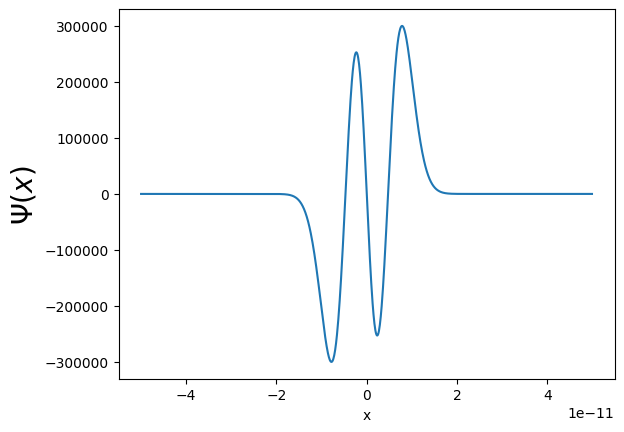

In [4]:
%matplotlib inline

#x_1 = np.arange(-0.5*(10)**10,0.5*(10)**10,10*9)
x_1 = np.arange(-5*10**(-11),5*10**(-11),10**(-13))
eps_1 = x_1*((m*omega_w/h_bar)**(1/2))

return_plot_Psi(eps_1, 3)


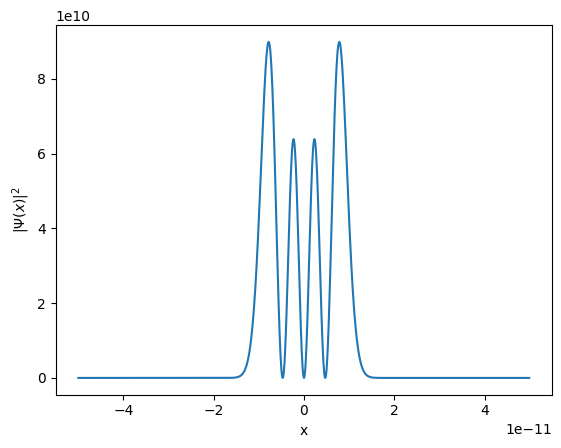

In [5]:
return_plot_Psi_squared(eps_1,3)

In [6]:
##calculate the numerical approximation of area
area = auc(x_1,probability_density(wavefunction(eps_1,1)))
print(area)

0.9999999999999998


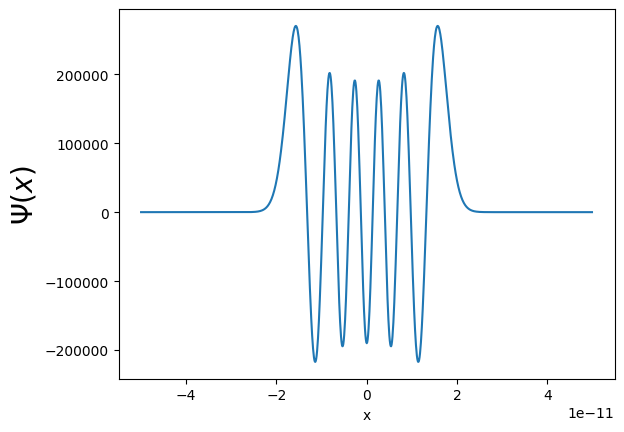

In [7]:
return_plot_Psi(eps_1, 10)

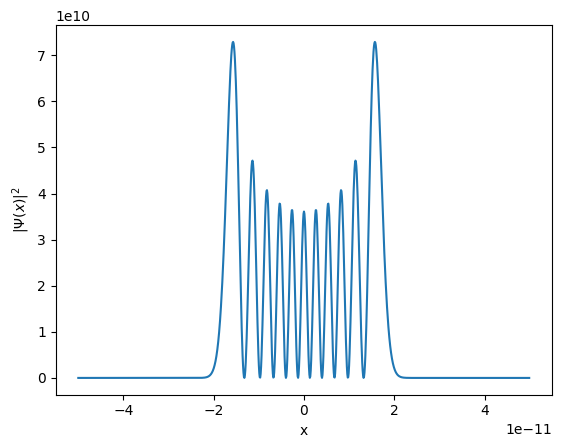

In [8]:
return_plot_Psi_squared(eps_1,10)